### logistic regression on breast cancer dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [2]:
cancer_data = load_breast_cancer()
print(cancer_data.keys())
print(cancer_data['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [3]:
cancer_data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
print(cancer_data['data'].shape)

(569, 30)


In [5]:
df = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


['malignant' 'benign']


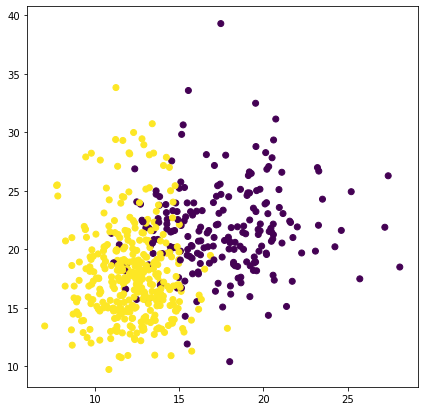

In [6]:
print(cancer_data['target_names'])
fig = plt.figure(figsize = (7, 7))
plt.scatter(df['mean radius'], df['mean texture'], c=df['target'])
plt.show()

In [7]:
X = df[cancer_data.feature_names].values
y = df['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 25)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [8]:
print(model.coef_, model.intercept_)
print(model.predict([X[0]]))

[[ 2.24978482  0.09809178  0.05156361 -0.00728959 -0.11750976 -0.45153939
  -0.64357864 -0.2895144  -0.22156468 -0.0421126   0.01574794  0.80143448
   0.70533538 -0.11397158 -0.02177338 -0.08993093 -0.14358389 -0.04033757
  -0.07441471 -0.00972275  1.32334239 -0.28151382 -0.26117024 -0.02218789
  -0.21866919 -1.17519874 -1.48707638 -0.49377683 -0.64875215 -0.12680477]] [0.3234825]
[0]


In [9]:
y_pred = model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred))

Accuracy:  0.9370629370629371
Precision:  0.9468085106382979
Recall:  0.956989247311828
F1 score:  0.9518716577540107
(array([0.91836735, 0.94680851]), array([0.9       , 0.95698925]), array([0.90909091, 0.95187166]), array([50, 93], dtype=int64))


In [10]:
col = np.array(df.columns)
col2 = []
col3 = []
for i in range(20):
    col2.append(col[i])
for i in range(10):
    col3.append(col[i])

1.0
0.9370629370629371
0.9090909090909091


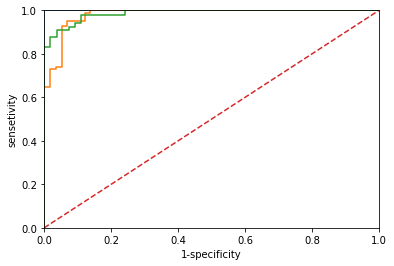

In [11]:
X1 = df[col].values
X2 = df[col2].values
X3 = df[col3].values
y = df['target'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y)
model1 = LogisticRegression(solver = 'liblinear')
model1.fit(X1_train, y1_train)
print(model1.score(X1_test, y1_test))
y1_pred_proba = model1.predict_proba(X1_test)
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_pred_proba[:, 1])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y)
model2 = LogisticRegression(solver = 'liblinear')
model2.fit(X2_train, y2_train)
print(model2.score(X2_test, y2_test))
y2_pred_proba = model2.predict_proba(X2_test)
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_pred_proba[:, 1])

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y)
model3 = LogisticRegression(solver = 'liblinear')
model3.fit(X3_train, y3_train)
print(model3.score(X3_test, y3_test))
y3_pred_proba = model3.predict_proba(X3_test)
fpr3, tpr3, thresholds3 = roc_curve(y3_test, y3_pred_proba[:,1])

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlabel('1-specificity')
plt.ylabel('sensetivity')
plt.xlim([0.00, 1.00])
plt.ylim([0.00, 1.00])
plt.show()

In [12]:
print("AUC Blue: ", roc_auc_score(y1_test, y1_pred_proba[:, 1]))
print("AUC Oranges: ", roc_auc_score(y2_test, y2_pred_proba[:, 1]))
print("AUC Green: ", roc_auc_score(y3_test, y3_pred_proba[:, 1]))

AUC Blue:  1.0
AUC Oranges:  0.9809330628803246
AUC Green:  0.9858510195588848


In [13]:
X = df[cancer_data.feature_names].values
y = df['target'].values
kf = KFold(n_splits = 5, shuffle = True)
scores = []
for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    model4 = LogisticRegression(solver = 'liblinear')
    model4.fit(X_train, y_train)
    scores.append(model4.score(X_test, y_test))
print(scores)
print(np.mean(scores))

[0.9385964912280702, 0.9122807017543859, 0.956140350877193, 0.9824561403508771, 0.9646017699115044]
0.9508150908244062


In [14]:
final_model = LogisticRegression(solver = 'liblinear')
final_model.fit(X,y)
final_model.score(X,y)

0.9595782073813708